# Genre recognition: experiment

Goal:

Conclusion:

Observations:

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'test_size'
Pvalues = [.1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .97, .98, .99]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = False
regen_baseline = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['data_scaling_graph'] = 'features'
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'euclidean'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 200

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['test_size'] = 0.1
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32


Elapsed time: 203.43 seconds


All self-referenced in the first column: True
dist in [0.0, 1.5347918272]
w in [0.00371022056788, 1.0]
Ones on the diagonal: 149000 (over 149000)


assert: True
W in [0.0, 1.0]


Datasets:


  L_data    : (2341668,), float32
  L_indices : (2341668,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2341668,), float32
  W_indices : (2341668,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = euclidean
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 212.49 seconds

 -------------------- Features -------------------- 

Attributes:


  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648,000 floats
  dim: 123,648 features per clip
  shape: (10, 100, 644, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Data: (149000, 96), float32
Attributes:


  K = 11
  dm = euclidean
  Csigma = 1
  diag = True
  laplacian = normalized
Datasets:
  L_data    : (2341668,), float32
  L_indices : (2341668,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2341668,), float32
  W_indices : (2341668,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Size X: 13.6 M --> 54.6 MiB
Size Z: 18.2 M --> 72.8 MiB
Size D: 12.0 k --> 48.0 kiB
Size E: 12.0 k --> 48.0 kiB
Elapsed time: 2685 seconds

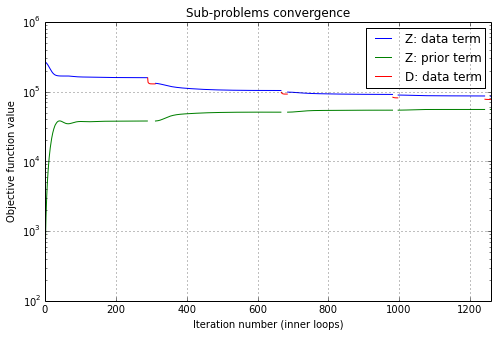

Inner loop: 1261 iterations
g(Z) = ||X-DZ||_2^2 = 7.691408e+04
rdiff: 0.00111579453637


i(Z) = ||Z||_1 = 5.535905e+04
j(Z) = tr(Z^TLZ) = 8.916660e+03


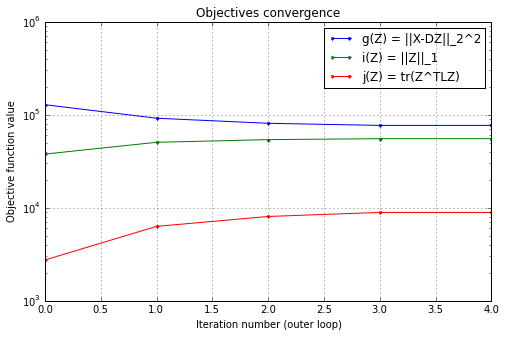

Global objective: 1.411898e+05


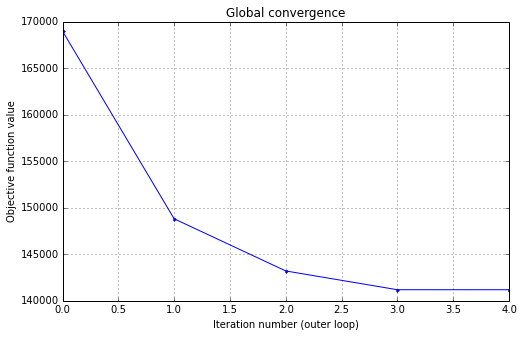

Outer loop: 5 iterations

Z in [-0.131474122405, 0.873808443546]
Sparsity of Z: 4,296,703 non-zero entries out of 19,072,000 entries, i.e. 22.5%.


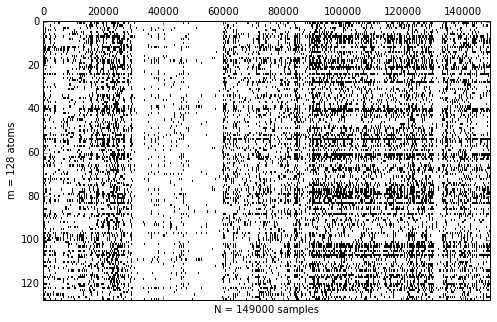

D in [-0.0787837356329, 0.908077061176]
d in [0.999999582767, 1.00000023842]
Constraints on D: True


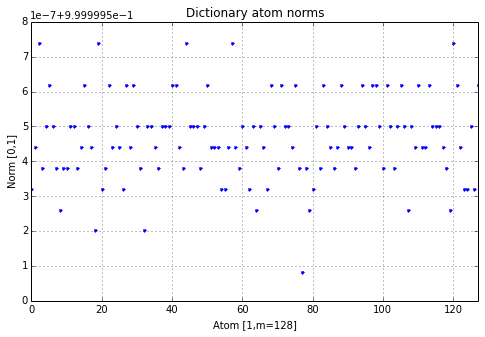

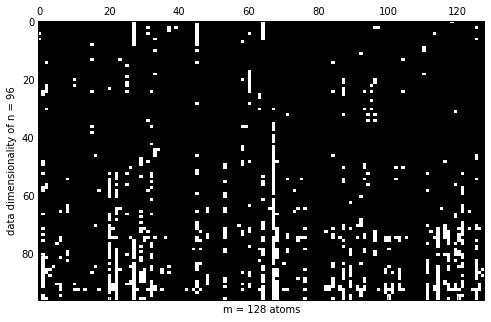

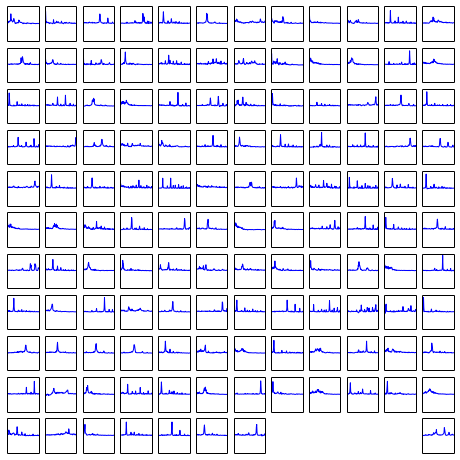

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2692 seconds

 -------------------- Classification, test_size = 0.1 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


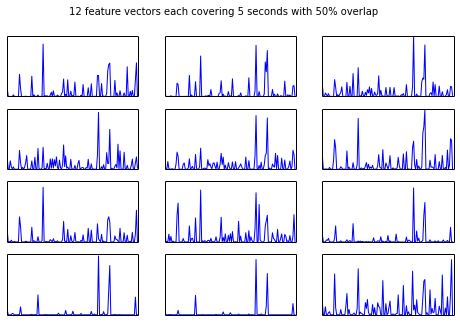

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  77 (+/- 1.5) <- [76 76 77 76 72 77 76 78 76 77]


  77 (+/- 1.6) <- [76 77 76 73 79 76 76 76 78 78]


  78 (+/- 1.3) <- [77 77 79 78 78 79 78 74 78 78]


  77 (+/- 1.4) <- [76 74 77 79 77 78 77 76 78 76]


  77 (+/- 0.9) <- [78 77 76 76 76 77 79 76 77 77]


  78 (+/- 0.7) <- [77 77 77 78 78 78 77 78 76 77]


  78 (+/- 1.4) <- [76 77 79 79 76 75 79 76 77 78]


  77 (+/- 1.7) <- [78 75 78 77 77 78 73 75 78 78]


  77 (+/- 1.6) <- [76 80 77 79 76 74 78 78 77 76]


  78 (+/- 1.5) <- [78 78 79 75 78 75 76 76 78 80]


  77 (+/- 2.1) <- [79 79 77 74 79 76 78 74 80 75]


  77 (+/- 1.7) <- [77 77 79 75 73 77 77 76 79 75]


  77 (+/- 1.4) <- [78 78 74 78 77 80 77 76 76 77]


  77 (+/- 1.5) <- [79 77 79 76 76 75 75 74 77 77]


  78 (+/- 1.1) <- [76 76 78 76 77 79 79 77 78 78]


  78 (+/- 2.0) <- [80 78 79 79 75 76 76 77 80 74]


  77 (+/- 1.3) <- [75 77 75 77 77 77 77 76 79 75]


  77 (+/- 1.4) <- [76 77 77 77 75 79 75 78 79 77]


  77 (+/- 1.4) <- [77 76 77 79 78 76 79 77 74 76]


  78 (+/- 1.7) <- [76 77 79 75 79 77 78 77 80 74]


Accuracy: 77.4 (+/- 1.54)
Mean time (20 cv): 20.96 seconds
Overall time: 423.32 seconds

 -------------------- Classification, test_size = 0.2 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


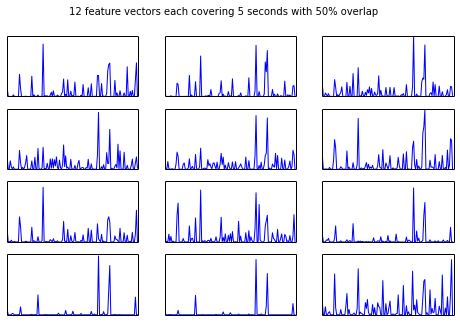

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 4800.0 training, 1200.0 testing
  77 (+/- 1.2) <- [77 76 77 77 74 77 76 77 74 77]


  77 (+/- 1.0) <- [77 76 76 74 78 77 77 75 76 77]


  77 (+/- 0.9) <- [77 76 76 77 78 78 76 76 78 78]


  77 (+/- 1.2) <- [75 75 77 78 76 78 78 75 76 76]


  77 (+/- 0.8) <- [78 76 77 75 77 78 77 77 76 77]


  78 (+/- 0.7) <- [77 77 78 78 78 78 76 78 77 77]


  78 (+/- 1.3) <- [76 77 78 78 77 76 80 75 76 78]


  77 (+/- 0.9) <- [75 76 75 76 75 78 77 76 76 77]


  77 (+/- 1.3) <- [76 78 77 79 75 75 79 77 77 77]


  77 (+/- 0.9) <- [76 78 77 76 77 75 78 76 77 78]


  77 (+/- 1.2) <- [79 77 76 75 78 76 78 75 77 76]


  77 (+/- 1.3) <- [76 77 78 77 74 79 76 75 78 76]


  77 (+/- 1.1) <- [77 77 77 76 76 78 77 76 77 74]


  77 (+/- 1.2) <- [79 77 78 75 75 76 76 77 77 76]


  78 (+/- 0.5) <- [77 78 77 77 77 78 76 78 78 78]


  77 (+/- 1.0) <- [78 77 77 77 76 75 76 78 77 76]


  77 (+/- 0.7) <- [76 76 76 76 78 77 76 76 77 75]


  77 (+/- 0.9) <- [75 77 78 77 76 76 78 77 77 76]


  77 (+/- 1.1) <- [78 76 77 76 77 77 79 77 75 76]


  77 (+/- 0.9) <- [76 75 77 76 76 75 78 76 77 77]


Accuracy: 77.1 (+/- 1.10)
Mean time (20 cv): 17.89 seconds
Overall time: 361.93 seconds

 -------------------- Classification, test_size = 0.3 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


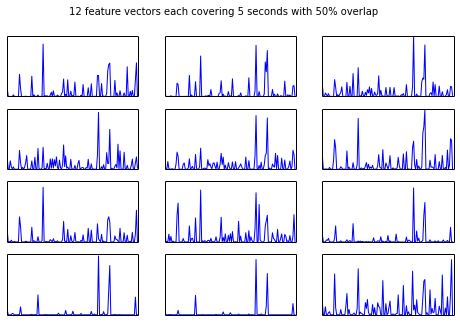

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 4200.0 training, 1800.0 testing
  76 (+/- 0.9) <- [76 75 76 76 74 76 76 78 76 76]


  76 (+/- 0.6) <- [77 76 76 75 77 76 76 75 76 76]


  77 (+/- 0.9) <- [77 77 76 76 78 77 76 75 78 76]


  77 (+/- 0.7) <- [76 75 75 77 76 77 76 76 76 76]


  77 (+/- 0.8) <- [77 75 77 76 77 77 77 76 77 78]


  77 (+/- 0.8) <- [77 77 76 78 78 77 75 77 76 77]


  77 (+/- 1.0) <- [77 77 78 77 77 75 78 75 77 77]


  77 (+/- 1.0) <- [75 77 75 76 76 78 77 75 76 76]


  77 (+/- 0.8) <- [77 77 77 77 76 75 77 76 77 75]


  77 (+/- 0.8) <- [76 76 77 74 76 76 77 76 78 77]


  77 (+/- 1.5) <- [80 78 77 75 77 76 77 75 76 76]


  77 (+/- 0.6) <- [77 77 77 76 76 76 77 75 77 76]


  77 (+/- 0.7) <- [77 76 77 76 76 76 76 77 77 75]


  77 (+/- 0.7) <- [77 76 76 75 76 76 76 77 76 76]


  77 (+/- 0.5) <- [77 77 77 77 76 77 77 75 77 77]


  77 (+/- 0.5) <- [77 76 77 77 76 76 76 77 77 76]


  77 (+/- 0.8) <- [75 76 77 76 78 77 76 76 77 76]


  77 (+/- 0.7) <- [75 76 75 76 77 76 78 77 76 76]


  77 (+/- 0.5) <- [76 76 76 76 77 77 77 77 76 76]


  76 (+/- 1.0) <- [77 74 76 76 75 75 76 77 77 76]


Accuracy: 76.8 (+/- 0.87)
Mean time (20 cv): 15.65 seconds
Overall time: 317.06 seconds

 -------------------- Classification, test_size = 0.4 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


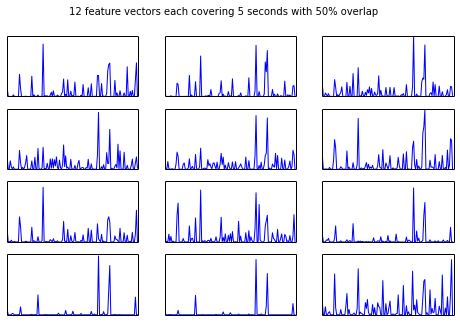

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 3600.0 training, 2400.0 testing
  76 (+/- 0.5) <- [76 75 76 75 75 75 75 76 75 76]


  76 (+/- 0.8) <- [75 77 75 75 75 76 77 75 76 76]


  77 (+/- 0.9) <- [77 76 77 75 77 76 76 74 77 76]


  76 (+/- 0.5) <- [75 75 75 77 76 76 75 75 76 76]


  76 (+/- 0.7) <- [76 75 77 76 77 76 76 76 75 76]


  77 (+/- 0.7) <- [76 76 76 76 78 75 76 77 76 76]


  77 (+/- 0.6) <- [76 77 76 77 76 74 76 76 76 76]


  76 (+/- 0.6) <- [74 76 76 76 75 76 76 75 75 76]


  76 (+/- 0.7) <- [75 76 77 77 76 75 77 75 75 75]


  76 (+/- 0.6) <- [76 76 76 74 76 76 77 76 76 77]


  76 (+/- 1.1) <- [78 77 76 74 76 75 76 75 75 75]


  77 (+/- 0.7) <- [76 76 78 75 76 75 76 76 76 76]


  77 (+/- 0.4) <- [76 77 75 76 76 76 76 77 76 76]


  76 (+/- 0.7) <- [77 77 75 75 76 75 76 76 77 77]


  76 (+/- 0.5) <- [76 75 76 75 76 76 76 75 76 76]


  76 (+/- 0.6) <- [76 75 75 75 75 75 76 76 76 74]


  76 (+/- 0.6) <- [75 75 75 76 77 75 76 76 76 76]


  76 (+/- 0.8) <- [75 75 75 75 77 77 77 76 76 77]


  77 (+/- 0.8) <- [76 77 77 76 76 75 78 75 75 75]


  76 (+/- 0.4) <- [76 75 75 76 75 76 76 76 76 76]


Accuracy: 76.3 (+/- 0.72)
Mean time (20 cv): 13.24 seconds
Overall time: 268.92 seconds

 -------------------- Classification, test_size = 0.5 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


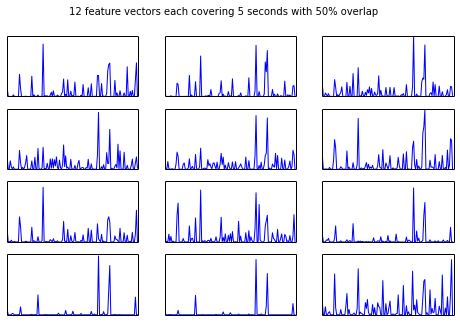

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 3000.0 training, 3000.0 testing
  75 (+/- 0.7) <- [76 74 75 75 74 75 75 76 75 75]


  75 (+/- 0.7) <- [75 74 75 75 74 76 76 74 75 76]


  76 (+/- 0.8) <- [77 75 76 74 76 75 75 74 75 76]


  75 (+/- 0.7) <- [75 75 75 75 76 76 75 74 76 74]


  76 (+/- 0.5) <- [76 74 76 76 75 76 75 76 76 75]


  76 (+/- 0.7) <- [76 77 74 75 76 75 75 76 75 75]


  76 (+/- 0.9) <- [75 74 77 76 75 74 76 75 76 76]


  75 (+/- 0.4) <- [74 75 75 75 75 76 75 74 75 75]


  76 (+/- 0.5) <- [74 75 75 76 75 75 76 75 75 74]


  76 (+/- 0.6) <- [75 76 74 75 75 76 76 75 76 76]


  76 (+/- 1.0) <- [76 76 75 74 76 74 76 75 74 76]


  76 (+/- 0.5) <- [75 76 76 75 75 75 76 74 76 76]


  76 (+/- 0.4) <- [74 75 76 75 75 75 75 75 75 76]


  76 (+/- 0.6) <- [76 75 75 74 75 75 76 75 76 76]


  76 (+/- 0.7) <- [74 76 75 74 76 76 75 75 74 75]


  76 (+/- 0.4) <- [75 75 75 75 75 75 76 75 76 76]


  76 (+/- 0.6) <- [76 75 75 76 76 76 75 74 76 76]


  76 (+/- 0.6) <- [75 75 75 75 76 76 76 74 75 76]


  76 (+/- 1.0) <- [75 76 76 76 75 75 77 75 73 75]


  76 (+/- 0.5) <- [76 76 75 75 76 74 75 75 75 76]


Accuracy: 75.7 (+/- 0.68)
Mean time (20 cv): 11.07 seconds
Overall time: 225.57 seconds

 -------------------- Classification, test_size = 0.6 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


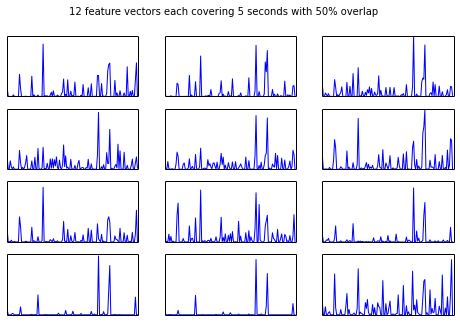

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 2400.0 training, 3600.0 testing
  75 (+/- 0.5) <- [75 74 74 73 73 74 75 75 74 74]


  75 (+/- 0.5) <- [74 73 74 74 74 74 75 74 74 75]


  75 (+/- 0.5) <- [75 74 75 73 74 74 75 74 75 74]


  75 (+/- 0.5) <- [74 74 74 73 74 75 75 73 74 74]


  75 (+/- 0.5) <- [75 74 75 75 74 75 75 75 74 74]


  75 (+/- 0.6) <- [74 75 74 74 76 74 75 74 74 75]


  75 (+/- 0.7) <- [75 74 75 75 75 74 76 75 75 74]


  75 (+/- 0.5) <- [75 74 74 74 73 75 75 74 74 75]


  75 (+/- 0.6) <- [74 73 75 76 74 74 74 74 75 74]


  75 (+/- 0.6) <- [74 75 73 73 74 75 74 75 74 75]


  75 (+/- 0.5) <- [75 75 74 73 74 74 74 74 74 75]


  75 (+/- 0.5) <- [76 75 75 74 75 74 75 75 75 75]


  75 (+/- 0.5) <- [74 74 75 74 74 75 74 75 74 74]


  75 (+/- 0.7) <- [74 75 74 74 74 73 75 74 75 75]


  75 (+/- 0.7) <- [73 74 74 73 75 76 75 75 76 75]


  75 (+/- 0.5) <- [75 74 74 74 74 74 75 74 75 74]


  75 (+/- 0.7) <- [75 75 73 76 74 75 74 75 75 75]


  75 (+/- 0.8) <- [74 74 73 73 75 75 74 73 75 75]


  75 (+/- 0.7) <- [74 75 75 75 74 75 76 75 74 74]


  75 (+/- 0.3) <- [75 74 74 74 74 74 74 74 74 74]


Accuracy: 74.8 (+/- 0.63)
Mean time (20 cv): 8.79 seconds
Overall time: 179.98 seconds

 -------------------- Classification, test_size = 0.7 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


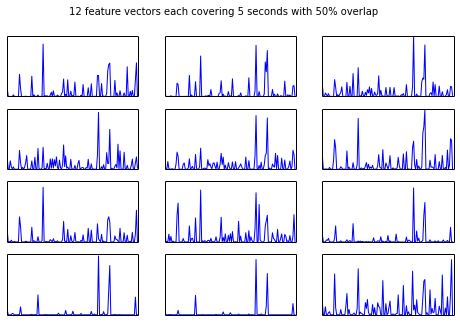

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 1800.0 training, 4200.0 testing
  73 (+/- 0.5) <- [74 73 73 72 73 73 73 73 72 73]


  73 (+/- 0.8) <- [72 71 74 73 72 73 74 73 73 73]


  73 (+/- 0.4) <- [73 72 72 72 73 73 73 73 73 73]


  73 (+/- 0.6) <- [72 73 73 72 74 73 73 73 73 74]


  74 (+/- 0.7) <- [73 73 74 73 71 74 73 73 73 74]


  73 (+/- 0.9) <- [72 74 73 71 74 72 73 72 73 73]


  74 (+/- 0.6) <- [74 73 73 73 73 72 74 74 74 74]


  73 (+/- 0.8) <- [74 72 72 73 71 72 74 72 72 73]


  73 (+/- 0.7) <- [73 71 73 73 72 72 73 74 74 73]


  73 (+/- 0.5) <- [73 72 72 73 73 73 73 73 72 73]


  73 (+/- 0.6) <- [74 72 73 73 73 73 72 73 73 73]


  74 (+/- 0.6) <- [73 74 75 72 73 73 74 73 73 73]


  73 (+/- 0.8) <- [72 72 73 73 72 74 74 73 72 72]


  73 (+/- 0.9) <- [73 73 72 73 73 70 74 72 73 74]


  74 (+/- 0.6) <- [72 72 73 73 74 73 74 72 73 74]


  73 (+/- 0.6) <- [74 73 73 73 73 73 74 72 74 72]


  73 (+/- 1.0) <- [73 73 72 75 72 74 72 74 73 72]


  73 (+/- 0.6) <- [72 73 72 73 73 73 73 73 74 74]


  73 (+/- 0.7) <- [73 73 73 73 72 72 74 74 72 73]


  74 (+/- 0.4) <- [73 73 73 73 74 73 73 73 74 72]


Accuracy: 73.4 (+/- 0.71)
Mean time (20 cv): 6.61 seconds
Overall time: 136.28 seconds

 -------------------- Classification, test_size = 0.8 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


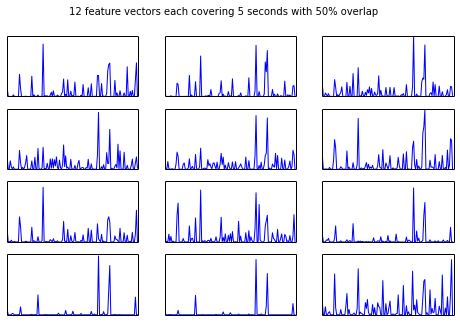

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 1200.0 training, 4800.0 testing
  72 (+/- 0.6) <- [71 72 71 69 71 71 71 72 71 71]


  71 (+/- 0.7) <- [71 70 71 71 70 72 71 70 71 70]


  71 (+/- 0.6) <- [71 69 71 70 70 70 71 70 71 70]


  71 (+/- 1.0) <- [70 71 71 72 72 70 70 69 69 72]


  71 (+/- 0.7) <- [71 70 72 71 70 72 70 70 71 70]


  71 (+/- 1.1) <- [70 71 71 71 70 68 72 69 71 70]


  71 (+/- 0.4) <- [72 70 71 71 71 71 71 71 71 71]


  71 (+/- 1.0) <- [69 71 71 71 69 70 73 70 70 71]


  71 (+/- 0.8) <- [69 70 71 71 70 71 71 72 72 70]


  71 (+/- 0.5) <- [70 71 70 71 72 72 70 70 71 70]


  71 (+/- 0.9) <- [71 71 72 68 71 70 70 70 71 71]


  72 (+/- 0.7) <- [72 72 72 70 72 71 70 71 71 71]


  71 (+/- 0.8) <- [69 70 71 70 70 72 71 71 69 70]


  71 (+/- 0.7) <- [71 70 71 70 71 69 70 71 71 71]


  71 (+/- 0.7) <- [70 70 71 71 71 70 71 70 71 72]


  71 (+/- 0.7) <- [71 70 71 71 71 70 72 70 71 69]


  71 (+/- 1.0) <- [71 70 70 72 69 71 69 70 71 70]


  71 (+/- 0.6) <- [70 71 70 70 70 70 72 70 72 70]


  71 (+/- 0.6) <- [70 70 70 72 70 70 71 72 70 70]


  71 (+/- 0.4) <- [71 71 71 71 72 71 70 71 71 70]


Accuracy: 71.1 (+/- 0.80)
Mean time (20 cv): 4.51 seconds
Overall time: 94.35 seconds

 -------------------- Classification, test_size = 0.9 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


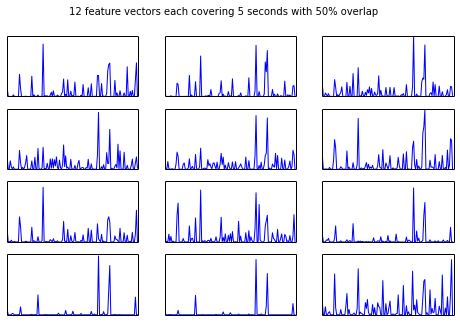

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 600.0 training, 5400.0 testing
  66 (+/- 0.7) <- [65 66 64 64 66 66 65 65 66 65]


  66 (+/- 1.0) <- [64 66 65 65 67 68 66 66 66 65]


  66 (+/- 0.5) <- [65 65 66 65 66 65 66 66 65 66]


  66 (+/- 1.1) <- [67 66 66 67 67 65 64 67 65 64]


  66 (+/- 1.0) <- [65 65 67 67 66 67 66 65 65 64]


  66 (+/- 1.0) <- [66 65 65 66 67 65 66 64 67 64]


  66 (+/- 0.6) <- [66 65 66 65 66 67 65 66 65 66]


  66 (+/- 0.8) <- [65 65 64 66 65 65 67 65 66 66]


  66 (+/- 0.5) <- [65 66 66 66 66 66 66 66 67 66]


  66 (+/- 1.0) <- [65 65 66 66 68 66 67 66 64 65]


  66 (+/- 1.0) <- [67 66 65 66 65 65 64 63 67 65]


  66 (+/- 0.9) <- [66 66 66 65 67 67 64 65 66 65]


  66 (+/- 0.7) <- [65 65 66 65 66 65 65 66 64 64]


  66 (+/- 0.6) <- [66 66 66 66 66 65 65 67 66 65]


  66 (+/- 0.7) <- [66 64 65 65 67 67 66 66 66 66]


  66 (+/- 1.1) <- [64 66 65 66 67 65 67 67 67 65]


  66 (+/- 0.9) <- [66 66 65 67 66 66 64 65 65 66]


  66 (+/- 0.8) <- [65 65 65 64 65 67 67 65 65 66]


  66 (+/- 1.0) <- [64 66 66 66 65 67 64 67 65 66]


  66 (+/- 0.7) <- [66 66 66 65 65 67 66 66 66 64]


Accuracy: 66.1 (+/- 0.87)
Mean time (20 cv): 2.40 seconds
Overall time: 52.03 seconds

 -------------------- Classification, test_size = 0.92 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


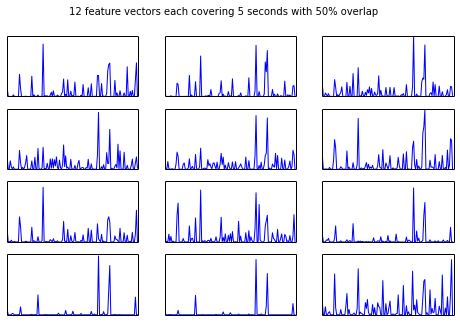

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 480.0 training, 5520.0 testing
  64 (+/- 0.8) <- [63 64 63 64 63 64 64 65 65 64]


  65 (+/- 0.9) <- [63 65 64 63 64 66 64 64 65 64]


  64 (+/- 0.9) <- [64 63 63 63 64 64 65 64 62 65]


  65 (+/- 1.2) <- [65 65 65 66 64 64 64 64 63 62]


  64 (+/- 0.9) <- [62 64 64 64 65 65 64 64 64 63]


  64 (+/- 1.3) <- [64 61 65 64 66 63 65 63 65 64]


  65 (+/- 0.8) <- [64 64 65 63 64 65 64 65 62 64]


  64 (+/- 1.1) <- [63 65 63 62 62 65 65 64 65 64]


  65 (+/- 0.4) <- [64 64 65 64 63 64 64 64 64 64]


  64 (+/- 1.2) <- [63 63 63 65 65 64 65 64 61 63]


  64 (+/- 0.8) <- [65 64 64 64 63 64 62 62 64 63]


  64 (+/- 0.9) <- [63 64 64 62 65 64 63 63 64 64]


  64 (+/- 0.6) <- [63 64 64 64 64 63 63 64 62 63]


  65 (+/- 0.7) <- [65 64 65 64 65 64 64 65 64 63]


  65 (+/- 1.1) <- [65 64 63 64 63 65 62 64 65 66]


  65 (+/- 1.5) <- [61 65 64 64 66 64 65 65 66 64]


  64 (+/- 0.8) <- [64 63 64 65 65 64 63 63 64 63]


  64 (+/- 0.8) <- [64 63 63 62 64 64 65 64 62 64]


  64 (+/- 1.4) <- [63 65 66 64 64 65 61 66 63 63]


  65 (+/- 1.0) <- [63 64 65 63 63 66 65 64 64 64]


Accuracy: 64.4 (+/- 1.02)
Mean time (20 cv): 1.97 seconds
Overall time: 43.54 seconds

 -------------------- Classification, test_size = 0.94 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


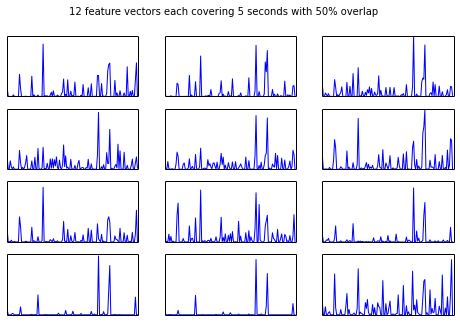

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 360.0 training, 5640.0 testing
  62 (+/- 0.6) <- [61 62 61 60 60 62 61 61 62 61]


  62 (+/- 1.2) <- [61 62 63 62 62 63 59 63 61 63]


  62 (+/- 1.3) <- [62 60 60 60 61 60 61 63 60 63]


  63 (+/- 1.0) <- [62 64 64 63 62 61 62 62 63 61]


  63 (+/- 1.0) <- [61 61 63 62 61 64 64 61 62 61]


  62 (+/- 1.2) <- [62 60 63 61 62 60 61 61 64 62]


  63 (+/- 1.0) <- [62 61 62 61 63 63 62 63 60 63]


  62 (+/- 0.8) <- [62 61 60 62 61 62 63 62 63 62]


  62 (+/- 0.7) <- [63 61 63 61 61 62 62 61 63 62]


  62 (+/- 0.9) <- [61 62 60 63 62 62 62 61 59 62]


  61 (+/- 0.9) <- [61 60 61 62 59 63 61 60 62 61]


  62 (+/- 1.4) <- [60 61 64 61 64 62 60 60 63 63]


  61 (+/- 1.3) <- [62 61 61 59 63 59 60 61 61 61]


  63 (+/- 1.0) <- [63 61 62 63 62 61 62 64 62 61]


  63 (+/- 0.9) <- [62 61 61 62 62 63 61 63 61 63]


  62 (+/- 1.5) <- [59 63 60 61 62 61 64 63 63 61]


  62 (+/- 0.6) <- [61 60 63 61 62 61 61 62 61 62]


  62 (+/- 1.1) <- [60 60 61 61 63 60 63 61 62 63]


  62 (+/- 1.7) <- [60 63 62 58 63 63 59 63 62 61]


  62 (+/- 1.0) <- [61 62 63 60 62 63 62 62 61 61]


Accuracy: 62.1 (+/- 1.17)
Mean time (20 cv): 1.54 seconds
Overall time: 34.90 seconds

 -------------------- Classification, test_size = 0.96 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


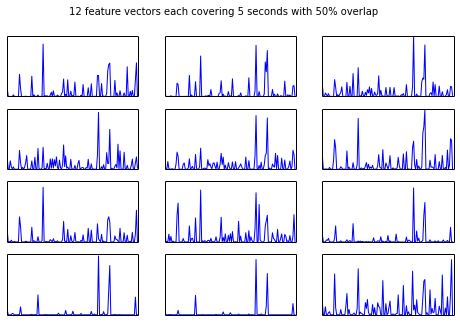

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 240.0 training, 5760.0 testing
  59 (+/- 0.9) <- [57 58 58 57 57 59 59 59 59 59]


  59 (+/- 1.5) <- [58 58 62 59 59 57 56 58 56 58]


  58 (+/- 1.2) <- [59 57 55 58 58 58 59 57 58 60]


  59 (+/- 1.6) <- [56 60 61 58 58 58 60 56 60 56]


  59 (+/- 1.3) <- [58 58 58 59 58 61 61 58 56 58]


  59 (+/- 1.5) <- [58 54 59 59 59 58 60 59 58 60]


  59 (+/- 1.4) <- [58 57 59 59 58 59 55 60 60 60]


  59 (+/- 1.0) <- [60 58 59 57 58 57 60 58 59 58]


  59 (+/- 0.7) <- [59 58 57 60 59 58 58 58 58 58]


  59 (+/- 1.0) <- [58 57 59 59 58 58 60 58 57 59]


  58 (+/- 1.3) <- [57 57 58 56 54 60 57 57 58 58]


  59 (+/- 1.6) <- [58 62 59 58 61 58 57 58 60 58]


  58 (+/- 1.2) <- [57 58 58 57 59 55 56 57 58 57]


  59 (+/- 1.7) <- [60 59 56 62 58 58 60 59 56 57]


  59 (+/- 1.2) <- [58 59 60 59 57 57 58 58 59 61]


  59 (+/- 1.4) <- [56 59 57 59 60 57 60 59 59 60]


  59 (+/- 1.4) <- [58 58 57 60 59 56 56 59 60 58]


  58 (+/- 1.0) <- [57 57 58 58 58 58 59 58 56 59]


  58 (+/- 1.2) <- [56 58 57 56 60 59 57 58 59 59]


  59 (+/- 1.0) <- [58 58 59 57 60 60 59 58 58 58]


Accuracy: 58.7 (+/- 1.35)
Mean time (20 cv): 1.09 seconds
Overall time: 25.87 seconds

 -------------------- Classification, test_size = 0.97 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


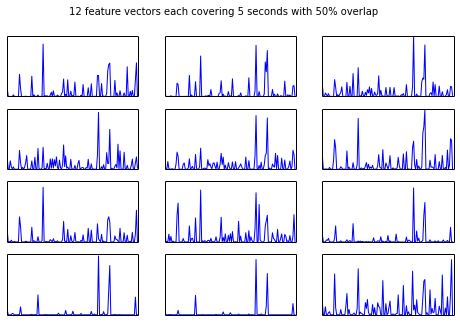

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 180.0 training, 5820.0 testing
  56 (+/- 1.3) <- [55 56 56 55 55 57 58 58 56 54]


  57 (+/- 1.7) <- [53 56 58 58 57 56 54 57 53 57]


  56 (+/- 1.6) <- [57 53 53 57 56 56 57 55 56 57]


  56 (+/- 1.5) <- [54 58 57 57 56 56 56 55 54 53]


  56 (+/- 1.1) <- [56 56 56 55 54 57 57 55 54 54]


  56 (+/- 1.6) <- [54 53 57 56 57 55 58 57 54 58]


  57 (+/- 1.5) <- [56 54 57 56 57 59 54 57 58 58]


  57 (+/- 1.1) <- [57 55 57 56 56 54 58 56 56 56]


  57 (+/- 1.4) <- [59 55 55 58 57 56 58 55 57 56]


  56 (+/- 1.2) <- [55 55 57 56 54 58 56 55 55 56]


  55 (+/- 1.5) <- [55 55 54 53 52 55 56 55 54 57]


  57 (+/- 1.6) <- [55 60 57 54 57 57 56 55 56 56]


  56 (+/- 1.6) <- [57 57 56 54 57 51 55 54 56 57]


  57 (+/- 1.6) <- [56 56 55 59 54 56 59 58 56 56]


  56 (+/- 1.8) <- [57 56 56 56 55 53 54 56 57 60]


  56 (+/- 1.5) <- [53 57 55 57 58 55 55 55 57 56]


  56 (+/- 1.1) <- [54 54 54 55 57 56 55 56 58 55]


  56 (+/- 1.4) <- [54 56 56 55 53 57 58 56 56 57]


  56 (+/- 1.2) <- [54 56 54 55 56 57 55 57 54 54]


  57 (+/- 1.1) <- [57 58 56 55 58 58 56 55 56 56]


Accuracy: 56.3 (+/- 1.52)
Mean time (20 cv): 0.86 seconds
Overall time: 21.31 seconds

 -------------------- Classification, test_size = 0.98 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


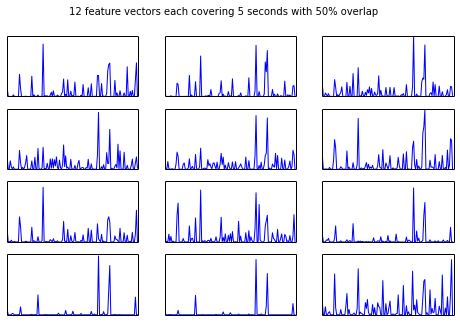

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 120.0 training, 5880.0 testing
  53 (+/- 1.1) <- [52 53 53 50 53 55 53 53 53 51]


  53 (+/- 2.0) <- [52 55 54 51 55 56 51 52 50 52]


  53 (+/- 1.9) <- [53 50 48 55 52 51 52 52 53 54]


  53 (+/- 1.2) <- [52 54 53 53 53 54 53 53 53 50]


  52 (+/- 1.2) <- [51 52 52 52 52 53 54 50 50 53]


  53 (+/- 1.5) <- [50 51 53 53 54 53 52 52 51 56]


  54 (+/- 1.8) <- [52 50 56 51 52 55 54 53 54 54]


  53 (+/- 2.6) <- [53 51 53 52 51 46 55 54 54 56]


  53 (+/- 1.3) <- [54 51 55 53 54 52 54 53 53 50]


  53 (+/- 1.2) <- [51 51 53 54 53 54 51 53 54 54]


  53 (+/- 1.4) <- [51 51 51 53 51 53 53 54 55 54]


  53 (+/- 1.6) <- [52 56 53 50 55 52 52 53 51 51]


  53 (+/- 1.9) <- [55 55 52 52 53 49 52 50 53 54]


  54 (+/- 1.5) <- [55 53 52 55 51 53 56 51 54 52]


  52 (+/- 2.1) <- [53 52 53 53 52 46 50 52 54 54]


  53 (+/- 1.5) <- [51 54 52 54 54 54 51 55 51 54]


  53 (+/- 1.5) <- [52 49 52 53 51 53 52 53 55 52]


  53 (+/- 2.0) <- [51 53 54 51 52 52 55 53 48 53]


  53 (+/- 1.3) <- [53 52 53 53 53 52 52 55 50 50]


  53 (+/- 1.5) <- [53 54 52 52 54 54 54 49 54 53]


Accuracy: 53.1 (+/- 1.70)
Mean time (20 cv): 0.63 seconds
Overall time: 16.59 seconds

 -------------------- Classification, test_size = 0.99 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)


Feature vectors:
  size: N=6,000 x n=128 -> 768,000 floats
  dim: 1,536 features per clip
  shape: (5, 100, 6, 2, 128)


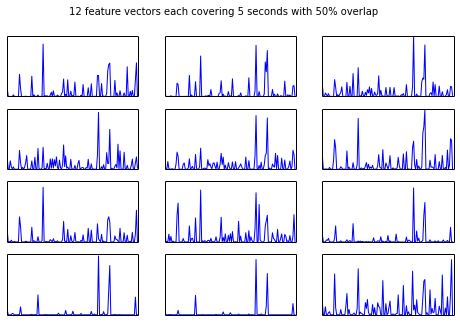

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.1 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.5 %


Clips accuracy: 74.0 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 60.0 training, 5940.0 testing
  48 (+/- 2.4) <- [48 51 44 43 46 49 47 47 49 50]


  48 (+/- 1.7) <- [46 50 49 44 49 49 48 48 47 47]


  48 (+/- 2.6) <- [45 44 49 51 49 45 50 47 44 51]


  48 (+/- 1.8) <- [46 50 48 46 50 51 49 46 47 48]


  48 (+/- 2.3) <- [43 49 46 46 47 48 48 49 44 51]


  48 (+/- 1.8) <- [44 47 49 48 50 47 46 46 46 50]


  49 (+/- 2.3) <- [46 49 53 49 45 49 48 47 45 49]


  48 (+/- 1.5) <- [47 45 48 48 47 47 49 48 48 51]


  48 (+/- 2.3) <- [50 43 48 48 47 47 52 47 46 47]


  49 (+/- 2.4) <- [48 44 47 51 50 49 47 48 51 53]


  48 (+/- 1.6) <- [48 50 47 46 45 44 49 48 47 47]


  48 (+/- 1.4) <- [46 51 48 48 49 47 47 47 49 47]


  48 (+/- 1.9) <- [50 50 51 48 47 46 49 48 45 47]


  49 (+/- 1.5) <- [51 50 47 45 48 48 48 50 48 48]


  48 (+/- 2.5) <- [47 49 51 47 46 42 49 48 48 51]


  49 (+/- 1.7) <- [50 47 47 46 50 48 47 50 45 50]


  48 (+/- 2.4) <- [51 43 46 48 44 49 46 49 48 49]


  48 (+/- 1.3) <- [47 48 48 46 46 49 48 49 47 51]


  48 (+/- 1.5) <- [51 47 46 46 48 49 46 47 47 48]


  48 (+/- 2.7) <- [47 48 52 45 44 48 46 42 50 50]


Accuracy: 48.2 (+/- 2.07)
Mean time (20 cv): 0.38 seconds
Overall time: 11.60 seconds

 -------------------- Baseline, test_size = 0.1 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

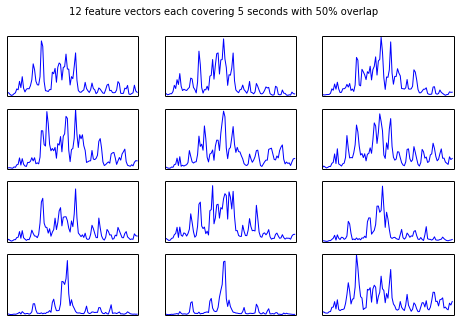

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  69 (+/- 2.2) <- [70 68 71 67 64 67 70 68 72 66]


  69 (+/- 1.4) <- [71 68 67 67 72 69 67 70 69 70]


  70 (+/- 2.0) <- [71 69 73 68 68 71 71 68 71 66]


  69 (+/- 1.4) <- [70 67 66 67 67 70 68 70 70 68]


  70 (+/- 2.4) <- [71 69 72 68 70 75 71 68 68 66]


  71 (+/- 0.7) <- [71 71 70 70 71 71 70 69 70 70]


  70 (+/- 1.4) <- [70 68 72 69 69 67 71 69 70 69]


  70 (+/- 1.5) <- [69 70 68 71 65 70 70 69 70 69]


  69 (+/- 1.7) <- [68 69 68 69 68 65 70 70 69 72]


  69 (+/- 1.8) <- [72 69 66 68 69 66 69 69 70 71]


  70 (+/- 1.4) <- [71 70 69 69 69 69 73 70 71 68]


  70 (+/- 1.6) <- [71 70 71 68 69 69 73 68 69 71]


  69 (+/- 1.3) <- [69 70 66 68 69 70 68 71 68 68]


  69 (+/- 2.0) <- [71 66 68 66 67 69 66 69 69 72]


  70 (+/- 1.1) <- [69 70 72 68 69 70 69 71 71 69]


  70 (+/- 2.0) <- [72 71 69 71 67 68 71 72 69 67]


  70 (+/- 1.6) <- [67 71 69 69 68 70 71 71 72 69]


  70 (+/- 0.9) <- [70 68 71 70 68 70 69 69 71 69]


  70 (+/- 1.2) <- [72 71 69 69 71 69 72 70 68 69]


  69 (+/- 1.7) <- [67 70 71 67 67 72 67 70 70 69]


Accuracy: 69.7 (+/- 1.71)
Mean time (20 cv): 16.93 seconds
Overall time: 342.40 seconds

 -------------------- Baseline, test_size = 0.2 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

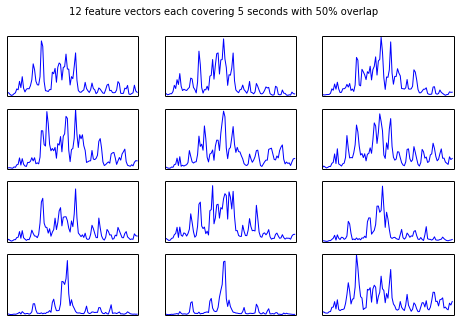

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 4800.0 training, 1200.0 testing
  69 (+/- 1.2) <- [70 69 69 69 66 67 70 68 70 68]


  69 (+/- 1.3) <- [70 70 67 69 68 71 68 68 67 70]


  70 (+/- 1.5) <- [70 69 72 67 68 71 69 70 70 68]


  69 (+/- 1.1) <- [70 68 69 66 67 69 69 68 68 69]


  70 (+/- 1.4) <- [71 70 71 67 70 72 70 68 69 69]


  70 (+/- 1.4) <- [70 70 69 72 72 68 67 69 70 69]


  70 (+/- 1.2) <- [68 68 71 70 69 68 71 68 70 69]


  69 (+/- 1.3) <- [67 70 67 69 67 71 70 68 68 69]


  69 (+/- 1.0) <- [68 67 69 70 69 68 68 68 70 71]


  69 (+/- 1.2) <- [71 69 68 67 70 68 69 70 69 68]


  70 (+/- 1.0) <- [70 69 69 68 71 68 71 69 69 69]


  69 (+/- 1.0) <- [70 69 70 67 68 69 71 68 68 68]


  69 (+/- 0.7) <- [70 69 67 68 68 68 68 69 69 69]


  69 (+/- 1.6) <- [71 69 68 65 68 69 69 70 70 70]


  70 (+/- 0.9) <- [69 71 71 69 69 70 69 71 71 68]


  70 (+/- 1.6) <- [71 69 68 70 68 68 69 73 68 68]


  69 (+/- 0.9) <- [68 69 68 69 70 70 69 70 70 68]


  69 (+/- 0.8) <- [70 69 70 68 68 68 69 67 69 69]


  70 (+/- 1.0) <- [71 70 68 69 69 68 70 70 71 70]


  69 (+/- 0.8) <- [69 68 69 68 67 68 68 67 69 70]


Accuracy: 69.4 (+/- 1.26)
Mean time (20 cv): 14.98 seconds
Overall time: 303.28 seconds

 -------------------- Baseline, test_size = 0.3 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

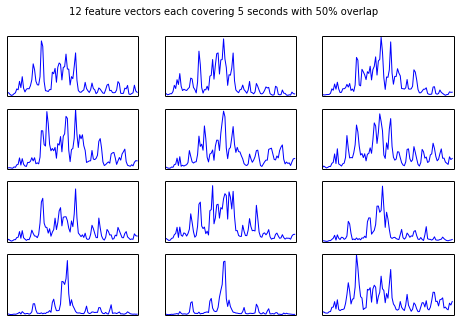

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 4200.0 training, 1800.0 testing
  68 (+/- 1.3) <- [69 68 69 66 66 68 68 70 68 68]


  69 (+/- 0.7) <- [69 70 67 69 68 69 69 69 68 69]


  69 (+/- 0.9) <- [70 69 69 68 69 70 69 68 70 67]


  69 (+/- 0.9) <- [70 68 68 68 68 69 68 68 69 70]


  70 (+/- 0.4) <- [69 69 70 69 69 69 69 69 69 68]


  69 (+/- 1.2) <- [70 71 68 71 70 68 67 67 68 69]


  69 (+/- 0.9) <- [69 68 70 68 68 69 71 67 70 68]


  69 (+/- 0.8) <- [68 69 67 69 68 70 69 69 69 69]


  69 (+/- 0.7) <- [69 67 70 70 68 69 69 68 69 70]


  69 (+/- 0.8) <- [70 68 68 68 68 68 69 69 69 69]


  69 (+/- 1.3) <- [72 69 69 67 69 68 69 67 68 68]


  69 (+/- 0.9) <- [69 69 70 67 67 69 70 69 69 68]


  68 (+/- 0.8) <- [68 69 67 68 67 68 67 70 69 67]


  69 (+/- 1.2) <- [69 68 68 65 68 69 68 68 69 70]


  70 (+/- 0.6) <- [69 70 69 68 69 70 69 69 70 69]


  69 (+/- 0.9) <- [69 68 70 69 67 67 69 70 68 68]


  70 (+/- 0.8) <- [68 69 69 69 70 70 69 70 70 67]


  69 (+/- 0.7) <- [67 68 69 67 68 68 69 69 68 69]


  70 (+/- 0.7) <- [70 69 68 69 70 69 69 69 70 70]


  69 (+/- 0.8) <- [68 68 69 69 66 68 68 68 69 68]


Accuracy: 69.1 (+/- 0.96)
Mean time (20 cv): 13.23 seconds
Overall time: 268.45 seconds

 -------------------- Baseline, test_size = 0.4 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

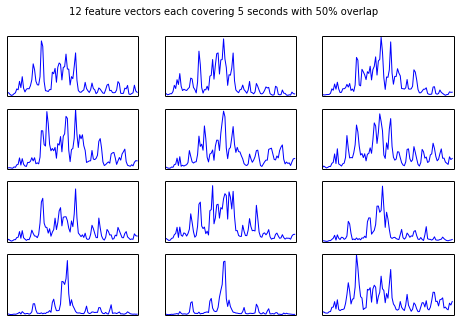

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 3600.0 training, 2400.0 testing
  69 (+/- 0.8) <- [69 68 68 66 67 68 68 69 69 68]


  68 (+/- 0.6) <- [68 69 68 68 67 68 68 68 68 67]


  69 (+/- 0.7) <- [68 69 69 67 68 69 69 67 69 67]


  68 (+/- 0.7) <- [68 69 68 68 68 68 66 67 68 68]


  69 (+/- 0.6) <- [68 68 70 69 70 69 68 68 69 68]


  69 (+/- 0.9) <- [68 69 69 70 70 67 69 68 67 69]


  69 (+/- 0.3) <- [68 69 69 68 68 68 68 68 68 68]


  69 (+/- 0.7) <- [67 69 67 68 69 69 68 68 69 68]


  69 (+/- 0.8) <- [67 67 69 69 68 68 67 68 69 69]


  69 (+/- 0.8) <- [68 67 68 66 69 68 68 69 69 69]


  68 (+/- 1.0) <- [70 68 68 66 68 67 68 67 68 67]


  69 (+/- 0.8) <- [68 68 70 68 68 69 67 69 69 68]


  68 (+/- 0.8) <- [68 68 67 67 67 68 68 69 69 68]


  69 (+/- 0.9) <- [68 69 68 66 67 69 68 68 70 68]


  69 (+/- 0.8) <- [69 69 67 66 68 69 68 68 69 69]


  68 (+/- 0.6) <- [68 67 69 68 67 67 69 68 68 68]


  69 (+/- 0.8) <- [67 69 68 68 69 69 68 68 69 67]


  68 (+/- 0.7) <- [68 67 68 68 68 67 69 68 68 69]


  69 (+/- 0.7) <- [69 69 68 70 67 68 68 67 68 68]


  68 (+/- 0.6) <- [67 69 68 68 67 68 69 68 68 68]


Accuracy: 68.6 (+/- 0.77)
Mean time (20 cv): 11.44 seconds
Overall time: 232.49 seconds

 -------------------- Baseline, test_size = 0.5 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

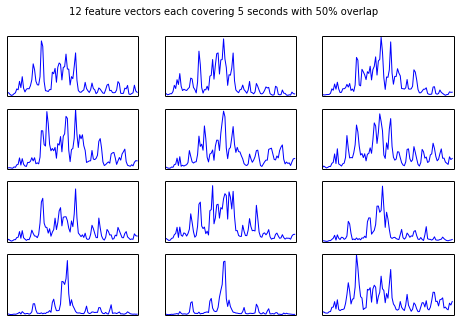

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 3000.0 training, 3000.0 testing
  68 (+/- 0.7) <- [68 67 68 66 66 67 67 68 68 68]


  68 (+/- 0.7) <- [67 68 69 68 66 68 68 67 67 68]


  68 (+/- 0.6) <- [68 68 68 67 67 68 69 67 68 67]


  68 (+/- 0.7) <- [68 68 67 67 68 68 67 66 68 67]


  68 (+/- 0.6) <- [68 67 69 68 69 69 68 68 68 67]


  68 (+/- 0.7) <- [68 68 67 68 70 68 68 67 67 68]


  68 (+/- 0.7) <- [69 67 68 67 67 67 67 67 66 67]


  68 (+/- 0.6) <- [67 68 67 67 69 68 67 67 67 66]


  68 (+/- 0.8) <- [66 67 67 68 69 68 67 67 68 68]


  68 (+/- 0.7) <- [68 66 67 66 67 67 67 67 68 68]


  68 (+/- 0.7) <- [68 69 67 67 68 67 68 67 67 69]


  68 (+/- 0.5) <- [68 67 69 67 68 68 67 68 69 68]


  68 (+/- 0.6) <- [68 67 66 67 67 68 67 68 67 67]


  68 (+/- 0.7) <- [68 67 68 67 67 68 68 67 69 68]


  68 (+/- 0.7) <- [68 67 66 66 67 68 68 67 68 68]


  68 (+/- 0.5) <- [67 67 68 67 67 66 68 67 67 68]


  68 (+/- 0.8) <- [68 68 68 67 68 69 67 68 68 67]


  68 (+/- 0.6) <- [67 67 66 67 67 68 68 66 68 68]


  68 (+/- 0.5) <- [68 69 68 68 67 67 68 67 68 68]


  68 (+/- 0.4) <- [68 68 68 68 67 68 68 67 67 68]


Accuracy: 68.1 (+/- 0.70)
Mean time (20 cv): 9.56 seconds
Overall time: 194.96 seconds

 -------------------- Baseline, test_size = 0.6 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

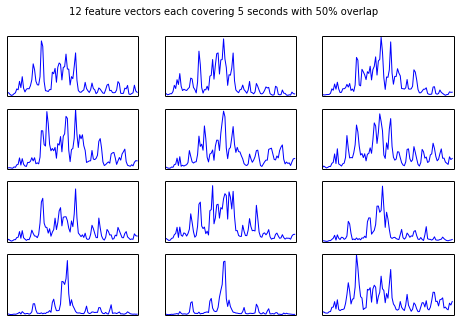

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 2400.0 training, 3600.0 testing
  67 (+/- 0.7) <- [67 67 66 66 65 66 66 67 67 67]


  67 (+/- 0.5) <- [68 67 67 67 66 67 67 67 66 68]


  68 (+/- 0.6) <- [67 67 68 66 68 67 68 66 67 66]


  67 (+/- 0.5) <- [67 67 67 67 67 68 68 66 67 67]


  67 (+/- 0.7) <- [67 66 68 67 68 67 66 67 67 67]


  67 (+/- 0.8) <- [67 67 67 67 68 66 67 67 66 68]


  67 (+/- 0.5) <- [67 66 68 67 67 67 67 67 66 66]


  67 (+/- 0.6) <- [66 67 67 67 67 68 67 66 66 66]


  67 (+/- 0.5) <- [67 66 66 67 67 67 67 67 67 68]


  67 (+/- 0.7) <- [67 67 65 66 66 67 67 67 66 66]


  67 (+/- 0.8) <- [67 68 66 66 68 67 67 66 66 68]


  68 (+/- 0.6) <- [67 67 67 67 68 67 66 68 67 67]


  67 (+/- 0.9) <- [66 66 67 67 67 68 64 66 67 66]


  67 (+/- 0.6) <- [66 67 67 66 66 67 67 66 68 67]


  67 (+/- 0.5) <- [66 66 67 66 67 67 67 66 67 67]


  67 (+/- 0.5) <- [67 66 67 67 67 66 67 68 66 67]


  68 (+/- 0.7) <- [68 67 68 68 67 67 66 68 67 66]


  67 (+/- 0.6) <- [67 67 67 66 67 68 67 66 67 67]


  68 (+/- 0.5) <- [67 67 68 68 67 67 67 68 68 67]


  67 (+/- 0.5) <- [67 67 67 66 66 67 68 67 67 67]


Accuracy: 67.3 (+/- 0.65)
Mean time (20 cv): 7.77 seconds
Overall time: 159.11 seconds

 -------------------- Baseline, test_size = 0.7 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

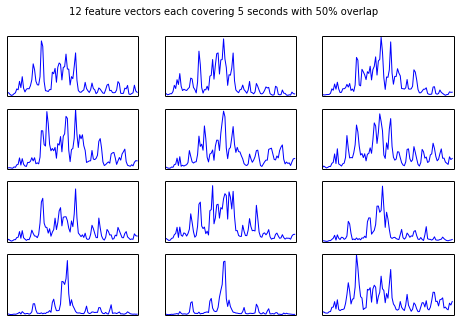

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 1800.0 training, 4200.0 testing
  66 (+/- 0.6) <- [66 66 65 65 65 66 66 67 66 66]


  66 (+/- 0.4) <- [65 66 66 66 65 65 66 66 65 66]


  66 (+/- 0.7) <- [66 67 65 65 66 66 67 65 66 65]


  67 (+/- 0.2) <- [66 66 66 66 66 66 67 66 66 66]


  67 (+/- 0.6) <- [67 66 66 66 66 66 65 66 66 66]


  66 (+/- 0.6) <- [66 66 66 67 67 66 66 66 64 66]


  66 (+/- 0.5) <- [66 65 66 67 65 66 66 66 65 66]


  66 (+/- 0.5) <- [65 66 66 66 66 66 66 65 65 65]


  66 (+/- 0.7) <- [65 65 65 66 65 66 65 67 66 67]


  66 (+/- 0.7) <- [66 66 64 65 66 65 65 66 65 65]


  66 (+/- 0.6) <- [65 66 65 65 67 65 66 66 66 66]


  67 (+/- 0.5) <- [66 66 67 65 67 66 66 67 66 66]


  66 (+/- 0.7) <- [66 65 66 66 65 66 64 66 66 65]


  66 (+/- 0.5) <- [66 66 67 66 65 65 66 66 67 66]


  66 (+/- 0.5) <- [66 65 67 65 66 66 66 66 66 66]


  66 (+/- 0.5) <- [66 66 66 66 67 65 66 66 66 65]


  66 (+/- 0.6) <- [66 66 65 66 66 65 65 66 65 65]


  66 (+/- 0.5) <- [66 66 66 66 66 67 66 65 67 66]


  66 (+/- 0.5) <- [65 65 66 67 65 65 66 65 66 66]


  66 (+/- 0.5) <- [65 65 66 66 65 66 66 67 66 66]


Accuracy: 66.3 (+/- 0.59)
Mean time (20 cv): 5.82 seconds
Overall time: 120.19 seconds

 -------------------- Baseline, test_size = 0.8 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

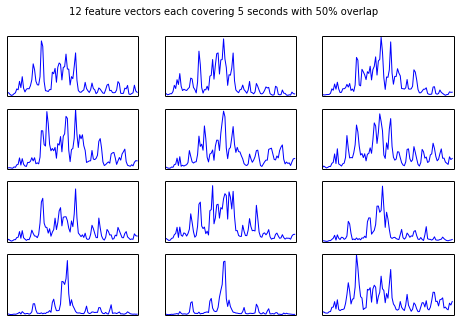

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 1200.0 training, 4800.0 testing
  65 (+/- 1.0) <- [64 65 63 63 65 64 66 64 65 64]


  64 (+/- 0.4) <- [64 64 64 64 64 64 64 64 63 63]


  65 (+/- 0.8) <- [63 64 65 64 63 65 65 63 64 64]


  65 (+/- 0.4) <- [64 64 64 65 64 65 65 64 65 64]


  64 (+/- 0.5) <- [64 64 64 64 64 64 63 65 63 63]


  64 (+/- 0.7) <- [65 64 64 63 64 63 63 64 63 63]


  64 (+/- 0.9) <- [64 62 64 64 63 65 64 63 64 66]


  65 (+/- 0.9) <- [64 66 63 64 64 64 65 65 65 63]


  64 (+/- 0.7) <- [62 64 64 65 64 63 63 65 64 64]


  65 (+/- 0.6) <- [65 65 64 64 64 64 63 64 63 64]


  64 (+/- 0.5) <- [64 64 63 64 65 64 64 64 64 65]


  65 (+/- 0.8) <- [64 64 66 64 64 64 65 65 65 66]


  64 (+/- 0.7) <- [64 63 63 65 64 65 63 64 65 63]


  64 (+/- 0.7) <- [64 63 64 63 63 63 63 64 65 62]


  65 (+/- 0.7) <- [65 63 65 63 65 63 65 64 64 65]


  65 (+/- 0.7) <- [64 63 65 65 65 64 65 64 63 63]


  64 (+/- 0.3) <- [64 63 64 64 64 64 64 64 64 63]


  64 (+/- 0.7) <- [64 64 64 62 63 64 64 63 64 63]


  64 (+/- 0.3) <- [63 63 64 63 64 63 64 64 64 64]


  65 (+/- 0.7) <- [63 64 64 64 63 65 64 65 65 65]


Accuracy: 64.5 (+/- 0.75)
Mean time (20 cv): 3.96 seconds
Overall time: 82.90 seconds

 -------------------- Baseline, test_size = 0.9 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

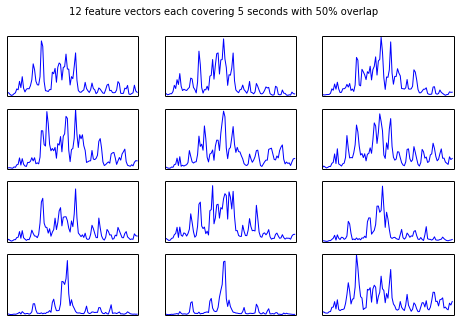

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 600.0 training, 5400.0 testing
  61 (+/- 1.2) <- [60 61 60 58 62 61 62 60 61 62]


  61 (+/- 0.8) <- [59 60 59 60 61 61 61 61 59 60]


  61 (+/- 0.6) <- [61 59 60 60 61 60 61 60 60 61]


  61 (+/- 0.8) <- [62 61 60 61 60 62 61 60 62 60]


  61 (+/- 1.0) <- [60 60 61 62 62 60 59 63 60 60]


  61 (+/- 0.7) <- [60 61 59 59 61 61 60 61 61 61]


  61 (+/- 1.0) <- [61 61 59 60 60 60 61 61 59 62]


  61 (+/- 1.0) <- [60 62 60 61 59 59 62 62 62 60]


  61 (+/- 0.9) <- [61 58 60 60 60 62 61 60 60 59]


  61 (+/- 1.0) <- [61 62 60 62 62 61 61 60 59 59]


  61 (+/- 0.7) <- [61 61 61 60 59 59 61 60 61 61]


  61 (+/- 0.7) <- [60 61 61 60 60 60 60 60 61 62]


  61 (+/- 0.6) <- [61 60 60 60 61 61 60 60 61 59]


  61 (+/- 0.8) <- [60 61 61 60 60 59 61 61 60 60]


  61 (+/- 0.9) <- [62 60 61 60 61 59 60 60 61 61]


  62 (+/- 0.6) <- [61 61 60 62 61 62 62 61 60 62]


  61 (+/- 0.6) <- [61 60 61 61 62 60 60 61 61 60]


  61 (+/- 0.6) <- [60 60 61 59 59 60 61 60 61 60]


  61 (+/- 0.7) <- [60 60 60 61 60 62 59 60 60 61]


  61 (+/- 0.6) <- [60 60 61 60 61 61 61 61 62 61]


Accuracy: 61.0 (+/- 0.86)
Mean time (20 cv): 2.07 seconds
Overall time: 45.28 seconds

 -------------------- Baseline, test_size = 0.92 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

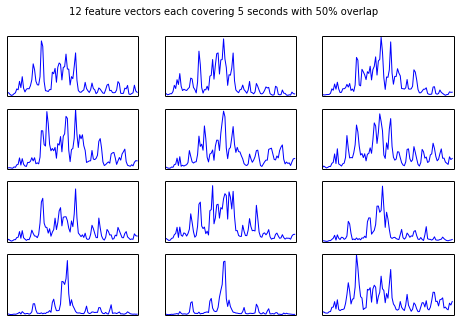

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 480.0 training, 5520.0 testing
  60 (+/- 1.0) <- [58 59 59 57 58 60 60 59 59 60]


  60 (+/- 0.9) <- [58 59 59 59 61 60 59 60 59 59]


  60 (+/- 0.9) <- [60 58 59 58 60 58 60 59 59 60]


  60 (+/- 0.9) <- [61 60 58 59 59 60 59 58 61 58]


  60 (+/- 1.3) <- [58 58 60 61 60 59 58 62 59 60]


  60 (+/- 0.5) <- [59 60 60 59 58 60 59 60 60 60]


  60 (+/- 1.0) <- [59 59 59 59 58 59 60 59 57 61]


  60 (+/- 0.9) <- [60 61 59 59 58 58 60 61 60 59]


  60 (+/- 0.9) <- [60 57 59 59 59 60 60 59 59 58]


  60 (+/- 0.8) <- [59 60 59 60 61 61 59 59 58 59]


  60 (+/- 1.0) <- [60 60 60 59 58 57 59 59 60 60]


  60 (+/- 0.9) <- [60 60 59 58 57 59 60 59 60 60]


  59 (+/- 0.8) <- [60 59 59 60 59 57 59 59 59 58]


  60 (+/- 0.8) <- [58 60 59 59 60 58 59 60 60 59]


  60 (+/- 0.8) <- [60 60 59 59 59 59 58 60 61 61]


  60 (+/- 0.7) <- [60 61 59 60 59 61 60 60 59 60]


  60 (+/- 0.6) <- [60 59 60 59 61 59 58 60 60 60]


  60 (+/- 0.7) <- [59 59 58 59 60 59 61 58 60 59]


  60 (+/- 0.9) <- [57 60 59 60 59 61 58 59 59 59]


  60 (+/- 0.7) <- [59 59 59 59 58 60 60 59 59 60]


Accuracy: 59.8 (+/- 0.90)
Mean time (20 cv): 1.69 seconds
Overall time: 37.66 seconds

 -------------------- Baseline, test_size = 0.94 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

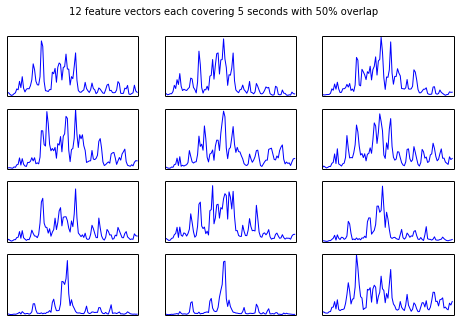

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 360.0 training, 5640.0 testing
  58 (+/- 1.1) <- [57 58 58 55 56 59 57 57 58 58]


  58 (+/- 1.4) <- [55 58 58 58 58 59 56 59 55 58]


  58 (+/- 1.0) <- [58 56 57 57 58 56 58 58 57 60]


  58 (+/- 0.7) <- [59 58 57 57 57 58 58 57 59 57]


  58 (+/- 1.1) <- [56 56 57 59 57 58 56 58 57 57]


  58 (+/- 1.0) <- [57 57 57 55 57 57 57 58 59 59]


  58 (+/- 1.3) <- [59 56 57 56 56 58 58 58 56 59]


  58 (+/- 0.8) <- [57 59 57 58 58 57 59 59 57 58]


  58 (+/- 0.8) <- [59 56 59 57 58 58 58 57 57 58]


  58 (+/- 1.0) <- [57 59 56 59 59 59 57 56 57 58]


  58 (+/- 0.8) <- [58 57 57 57 57 56 59 57 58 59]


  58 (+/- 0.8) <- [59 57 58 57 56 57 58 57 59 59]


  58 (+/- 1.2) <- [59 58 57 57 59 56 56 56 58 56]


  58 (+/- 1.5) <- [55 59 58 58 58 54 59 58 57 59]


  58 (+/- 0.9) <- [58 57 58 58 59 55 57 58 57 58]


  59 (+/- 1.0) <- [58 59 57 56 59 59 59 58 58 59]


  58 (+/- 1.3) <- [59 55 58 56 59 57 56 59 57 59]


  58 (+/- 1.1) <- [58 57 56 58 59 57 59 58 58 60]


  58 (+/- 1.1) <- [56 59 57 59 58 59 56 58 58 58]


  58 (+/- 0.6) <- [58 58 58 57 57 59 57 58 58 57]


Accuracy: 58.1 (+/- 1.08)
Mean time (20 cv): 1.30 seconds
Overall time: 29.85 seconds

 -------------------- Baseline, test_size = 0.96 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

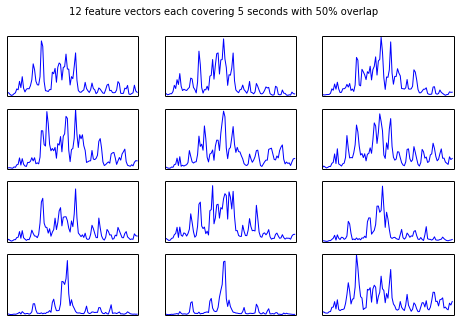

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 240.0 training, 5760.0 testing
  55 (+/- 1.4) <- [56 56 52 53 53 57 55 53 54 55]


  55 (+/- 1.5) <- [54 56 55 56 55 55 53 56 51 56]


  56 (+/- 1.1) <- [54 53 55 55 56 55 55 56 55 57]


  56 (+/- 1.0) <- [56 55 55 55 57 57 57 54 57 55]


  54 (+/- 1.4) <- [53 52 54 56 53 55 53 55 52 54]


  56 (+/- 1.5) <- [56 55 53 53 57 53 56 56 55 57]


  55 (+/- 1.2) <- [55 53 55 56 53 57 55 55 54 56]


  56 (+/- 1.2) <- [56 55 54 58 55 54 57 56 55 58]


  55 (+/- 1.0) <- [56 53 55 56 56 56 55 54 55 54]


  56 (+/- 1.1) <- [55 56 54 57 54 57 54 56 54 56]


  55 (+/- 1.0) <- [56 52 55 55 55 55 55 55 56 55]


  56 (+/- 1.1) <- [57 56 55 54 54 55 55 54 57 55]


  55 (+/- 1.2) <- [54 57 55 54 56 52 54 53 56 54]


  56 (+/- 1.9) <- [55 56 56 57 56 52 55 56 51 56]


  56 (+/- 1.3) <- [54 56 56 57 56 53 54 54 54 56]


  56 (+/- 1.2) <- [57 58 54 55 56 55 56 57 56 56]


  56 (+/- 1.5) <- [55 52 55 55 56 53 55 57 56 57]


  56 (+/- 1.1) <- [54 56 54 56 57 54 54 54 55 56]


  55 (+/- 1.2) <- [53 56 52 55 55 56 54 55 54 54]


  55 (+/- 0.8) <- [55 54 55 54 56 56 55 54 56 55]


Accuracy: 55.5 (+/- 1.37)
Mean time (20 cv): 0.91 seconds
Overall time: 22.00 seconds

 -------------------- Baseline, test_size = 0.97 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

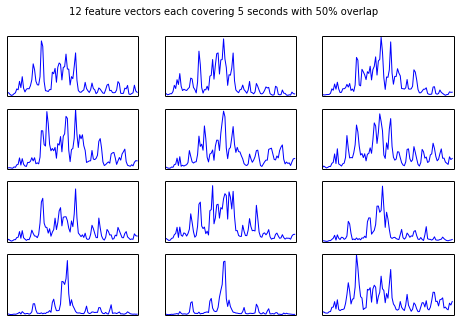

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 180.0 training, 5820.0 testing
  53 (+/- 2.0) <- [53 52 50 49 52 54 56 53 54 52]


  54 (+/- 2.2) <- [50 54 54 56 56 53 53 54 49 55]


  54 (+/- 1.3) <- [53 50 53 53 54 53 52 54 54 54]


  55 (+/- 0.8) <- [54 55 53 55 54 53 54 53 55 53]


  52 (+/- 1.6) <- [51 51 52 55 49 52 52 54 51 52]


  54 (+/- 1.0) <- [54 52 52 53 55 52 54 54 53 54]


  54 (+/- 1.4) <- [54 50 54 54 52 54 54 54 53 55]


  54 (+/- 1.3) <- [54 54 51 55 54 53 54 54 52 55]


  54 (+/- 1.2) <- [55 51 54 53 55 55 54 53 53 52]


  53 (+/- 1.4) <- [52 54 53 54 50 55 51 53 53 53]


  53 (+/- 1.2) <- [53 50 53 54 51 53 53 52 54 53]


  54 (+/- 1.8) <- [56 56 54 54 53 53 52 50 56 53]


  54 (+/- 1.5) <- [52 55 54 54 54 52 51 51 55 53]


  54 (+/- 1.1) <- [52 54 53 55 54 52 54 54 52 54]


  54 (+/- 1.5) <- [53 55 54 54 54 50 52 53 55 54]


  54 (+/- 1.0) <- [54 56 54 54 55 52 53 54 54 54]


  54 (+/- 1.8) <- [52 50 52 53 54 53 53 57 54 55]


  55 (+/- 1.3) <- [53 54 55 54 56 53 53 54 52 55]


  53 (+/- 1.7) <- [51 54 52 53 52 51 52 56 51 51]


  54 (+/- 1.0) <- [54 53 55 53 56 54 54 53 54 53]


Accuracy: 53.7 (+/- 1.55)
Mean time (20 cv): 0.71 seconds
Overall time: 18.06 seconds

 -------------------- Baseline, test_size = 0.98 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

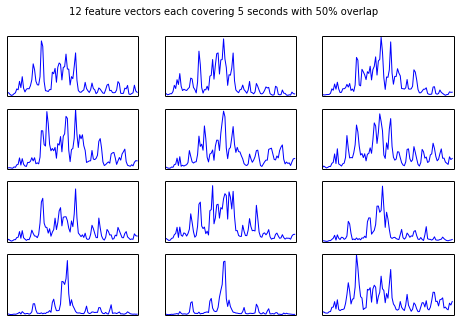

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 120.0 training, 5880.0 testing
  49 (+/- 4.5) <- [50 52 50 47 49 51 53 36 52 50]


  51 (+/- 2.3) <- [49 51 49 52 53 52 52 51 46 52]


  50 (+/- 2.1) <- [52 45 50 50 50 49 47 51 52 51]


  51 (+/- 1.6) <- [51 53 49 52 50 49 50 49 53 52]


  50 (+/- 1.8) <- [47 51 48 52 48 47 51 51 49 52]


  52 (+/- 1.5) <- [51 50 49 53 54 52 51 49 52 52]


  51 (+/- 1.8) <- [51 47 52 52 51 53 52 50 49 52]


  51 (+/- 1.5) <- [49 51 47 51 50 49 52 52 52 49]


  51 (+/- 1.5) <- [53 47 49 51 52 50 50 51 52 49]


  51 (+/- 1.2) <- [50 50 52 51 48 51 49 52 52 52]


  51 (+/- 1.8) <- [53 47 51 52 48 51 52 51 51 50]


  51 (+/- 2.5) <- [54 55 52 51 51 51 47 47 51 47]


  51 (+/- 1.5) <- [49 54 50 52 51 50 50 50 50 52]


  51 (+/- 2.0) <- [51 51 51 54 53 50 48 49 48 53]


  51 (+/- 2.0) <- [50 51 52 51 50 45 49 51 53 50]


  52 (+/- 1.6) <- [51 53 49 52 53 50 51 55 50 50]


  51 (+/- 2.2) <- [49 46 48 54 51 49 51 53 52 52]


  52 (+/- 1.7) <- [50 53 53 53 53 52 51 53 48 50]


  51 (+/- 1.9) <- [50 52 50 53 50 46 51 51 48 48]


  52 (+/- 1.6) <- [51 53 53 52 54 51 53 49 53 49]


Accuracy: 51.1 (+/- 2.15)
Mean time (20 cv): 0.50 seconds
Overall time: 13.91 seconds

 -------------------- Baseline, test_size = 0.99 -------------------- 

Software versions:


  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 149, 2, 96)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=96 -> 14,304,000 floats
  dim: 28,608 features per clip
  shape: (5, 100, 298, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Truncated and grouped:
  size: N=135,000 x n=96 -> 12,960,000 floats
  dim: 25,920 features per clip
  shape: (5, 100, 6, 45, 96)
Feature vectors:
  size: 

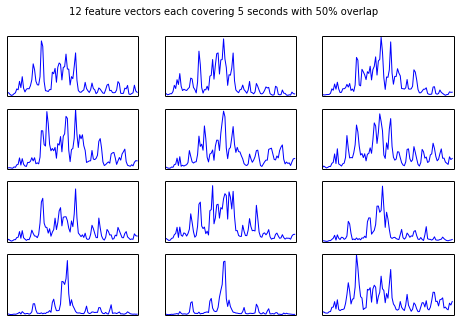

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %


5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %


Clips accuracy: 68.5 %


5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 60.0 training, 5940.0 testing
  46 (+/- 2.6) <- [46 49 46 41 46 47 45 40 47 45]


  46 (+/- 2.0) <- [46 47 43 42 49 47 48 47 44 46]


  46 (+/- 2.4) <- [44 40 46 49 48 44 45 46 47 46]


  47 (+/- 2.5) <- [45 49 42 46 51 45 45 43 48 46]


  46 (+/- 2.9) <- [41 46 44 48 44 41 46 50 44 48]


  47 (+/- 1.4) <- [48 45 44 47 48 47 46 45 47 48]


  47 (+/- 2.8) <- [48 39 50 45 44 50 46 46 46 46]


  45 (+/- 3.7) <- [49 44 35 44 48 44 48 46 44 47]


  46 (+/- 1.6) <- [44 42 48 45 45 46 48 45 46 46]


  45 (+/- 4.8) <- [47 42 46 46 45 46 46 46 47 30]


  46 (+/- 2.0) <- [49 42 46 47 47 42 46 45 45 47]


  45 (+/- 4.6) <- [49 48 48 48 35 49 39 43 48 43]


  47 (+/- 2.4) <- [44 50 48 48 49 47 50 45 42 47]


  49 (+/- 1.5) <- [48 48 46 47 51 48 51 48 46 49]


  46 (+/- 3.8) <- [42 47 47 49 42 37 45 48 49 48]


  48 (+/- 2.5) <- [48 48 44 44 50 46 50 51 44 48]


  47 (+/- 2.9) <- [51 41 44 49 45 44 46 49 45 50]


  48 (+/- 1.8) <- [44 47 48 47 49 49 46 50 45 49]


  46 (+/- 2.4) <- [47 47 42 45 45 41 48 49 45 44]


  47 (+/- 2.1) <- [46 49 48 46 46 47 46 42 50 47]


Accuracy: 46.5 (+/- 2.95)
Mean time (20 cv): 0.30 seconds
Overall time: 9.78 seconds


In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if regen_baseline:
    res['baseline'] = []
    res['baseline_std'] = []
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
        res['baseline'].append(accuracy)
        res['baseline_std'].append(accuracy_std)
else:
    separator('Baseline')
    %run audio_classification.ipynb
    res['baseline'] = len(Pvalues) * [accuracy]
    res['baseline_std'] = accuracy_std

## Results

test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.97, 0.98, 0.99]
res['accuracy_std'] = [1.5363231720210719, 1.0950963935248403, 0.86717893514288968, 0.72294293300024748, 0.67640643600328565, 0.62754813892375372, 0.71340338361624156, 0.79955032256636105, 0.868960165685013, 1.0195348949478793, 1.1721948847062518, 1.3469688402723865, 1.5173057279206219, 1.7022533880862585, 2.0739585760836468]
res['objective_j'] = [8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906, 8916.6603088378906]
res['objective_i'] = [55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875, 55359.046875]
res['objective_h'] = [0,

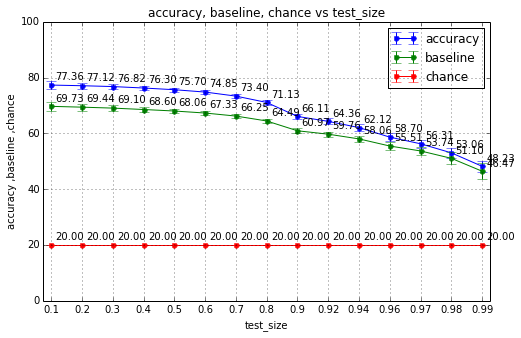

Experiment time: 7007 seconds


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))